In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
##import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline


In [8]:


from pandas import read_csv
##from pandas.tools.plotting import parallel_coordinates
from matplotlib import pyplot as plt

In [9]:
data = pd.read_csv('/home/manoj/Downloads/minute_weather.csv')

In [11]:
data.shape


(1587257, 13)

In [12]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [13]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape


(158726, 13)

In [14]:
sampled_df.head()


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [15]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [16]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [17]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [18]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [19]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]




In [20]:
rows_before - rows_after

46

In [21]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [22]:
sampled_df.shape

(158680, 11)

In [23]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [24]:
select_df = sampled_df[features]


In [25]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [26]:
select_df.head()



,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


In [27]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [28]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [29]:
centers = model.cluster_centers_
centers

array([[ 0.72522941,  0.43873076,  0.28636009, -0.53488499,  0.47374682,
        -0.5410916 , -0.7683322 ],
       [-0.8393868 , -1.2007128 ,  0.37566636,  0.37432283,  0.47426266,
         0.36191559,  1.3615795 ],
       [-0.1642835 ,  0.86389695, -1.31104333, -0.58967442, -1.16673641,
        -0.60496632, -0.64085273],
       [ 1.36643949, -0.080717  , -1.20730141, -0.05206407, -1.07599064,
        -0.0318767 , -0.97764871],
       [ 0.13188084,  0.84194408,  1.41168362, -0.63867918,  1.67580273,
        -0.58953599, -0.71337271],
       [-0.70114738,  0.5390664 ,  0.17611504, -0.58452793,  0.34554726,
        -0.59799082, -0.11139911],
       [-0.21076018,  0.63432832,  0.408636  ,  0.73338537,  0.51685682,
         0.67160431, -0.1513914 ],
       [ 0.23912432, -0.99751925,  0.65655427, -0.54655948,  0.84569985,
        -0.5292326 ,  1.16349943],
       [ 0.06066647, -0.7886923 , -1.19729735, -0.57070869, -1.04339821,
        -0.58530271,  0.87895152],
       [-1.18242891, -0.8695

In [30]:

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [31]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [32]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.725229,0.438731,0.286360,-0.534885,0.473747,-0.541092,-0.768332,0
1,-0.839387,-1.200713,0.375666,0.374323,0.474263,0.361916,1.361580,1
2,-0.164283,0.863897,-1.311043,-0.589674,-1.166736,-0.604966,-0.640853,2
3,1.366439,-0.080717,-1.207301,-0.052064,-1.075991,-0.031877,-0.977649,3
4,0.131881,0.841944,1.411684,-0.638679,1.675803,-0.589536,-0.713373,4
5,-0.701147,0.539066,0.176115,-0.584528,0.345547,-0.597991,-0.111399,5
6,-0.210760,0.634328,0.408636,0.733385,0.516857,0.671604,-0.151391,6
7,0.239124,-0.997519,0.656554,-0.546559,0.845700,-0.529233,1.163499,7
8,0.060666,-0.788692,-1.197297,-0.570709,-1.043398,-0.585303,0.878952,8
9,-1.182429,-0.869598,0.446783,1.984472,0.538217,1.945512,0.907633,9


# Dry Days

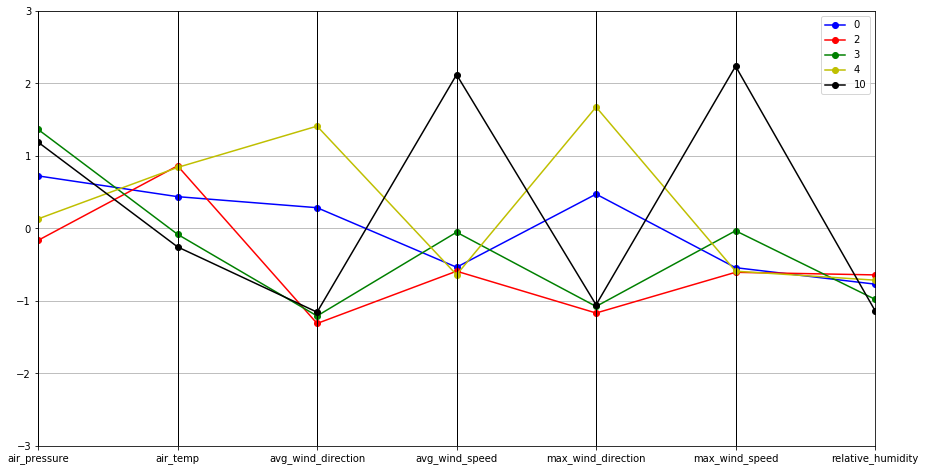

In [37]:


parallel_plot(P[P['relative_humidity'] < -0.5])




# Warm Days

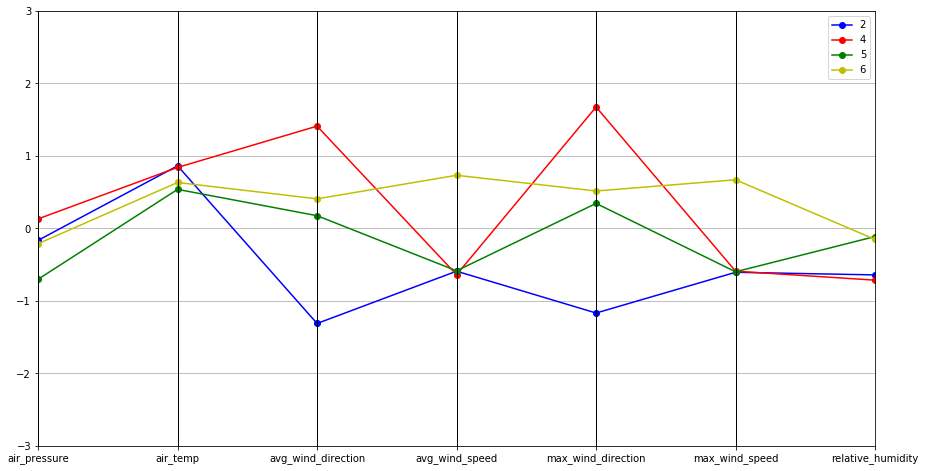

In [38]:


parallel_plot(P[P['air_temp'] > 0.5])



# Cool Days

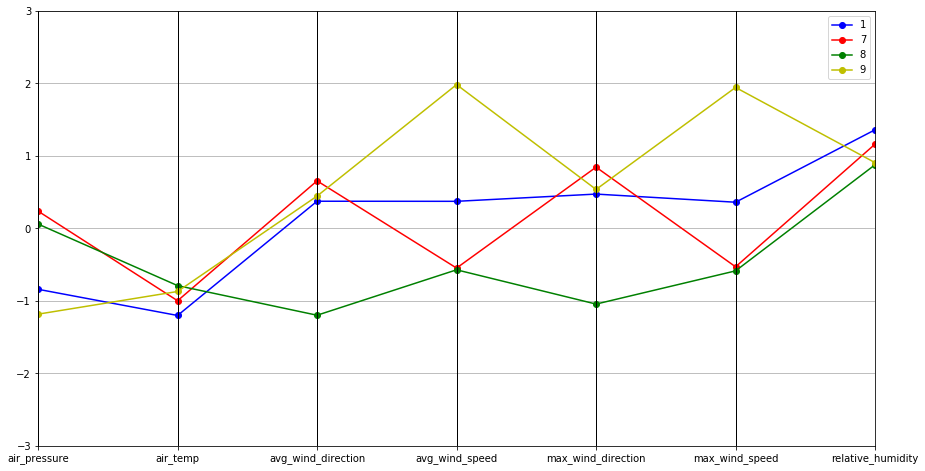

In [40]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])